In [ ]:
# Statistiques UK/US retails sales 

/var/folders/vq/7f683s5n6990zmj58mg4vms40000gn/T/ipykernel_38020/1600513822.py:20: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  revenue_by_segment = df.pivot_table(


<Figure size 1500x600 with 0 Axes>

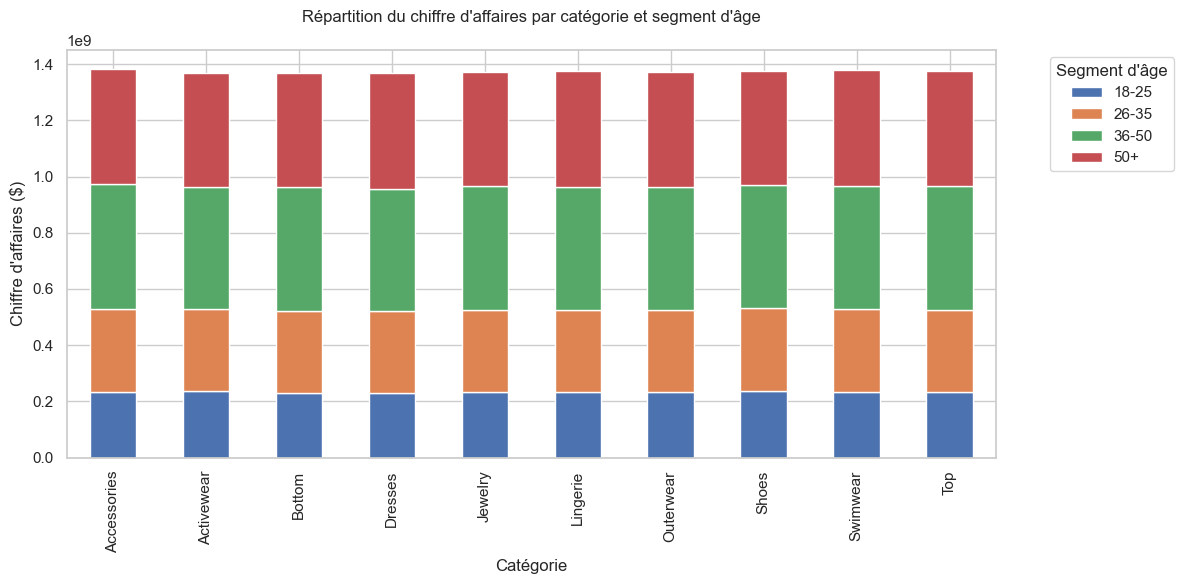

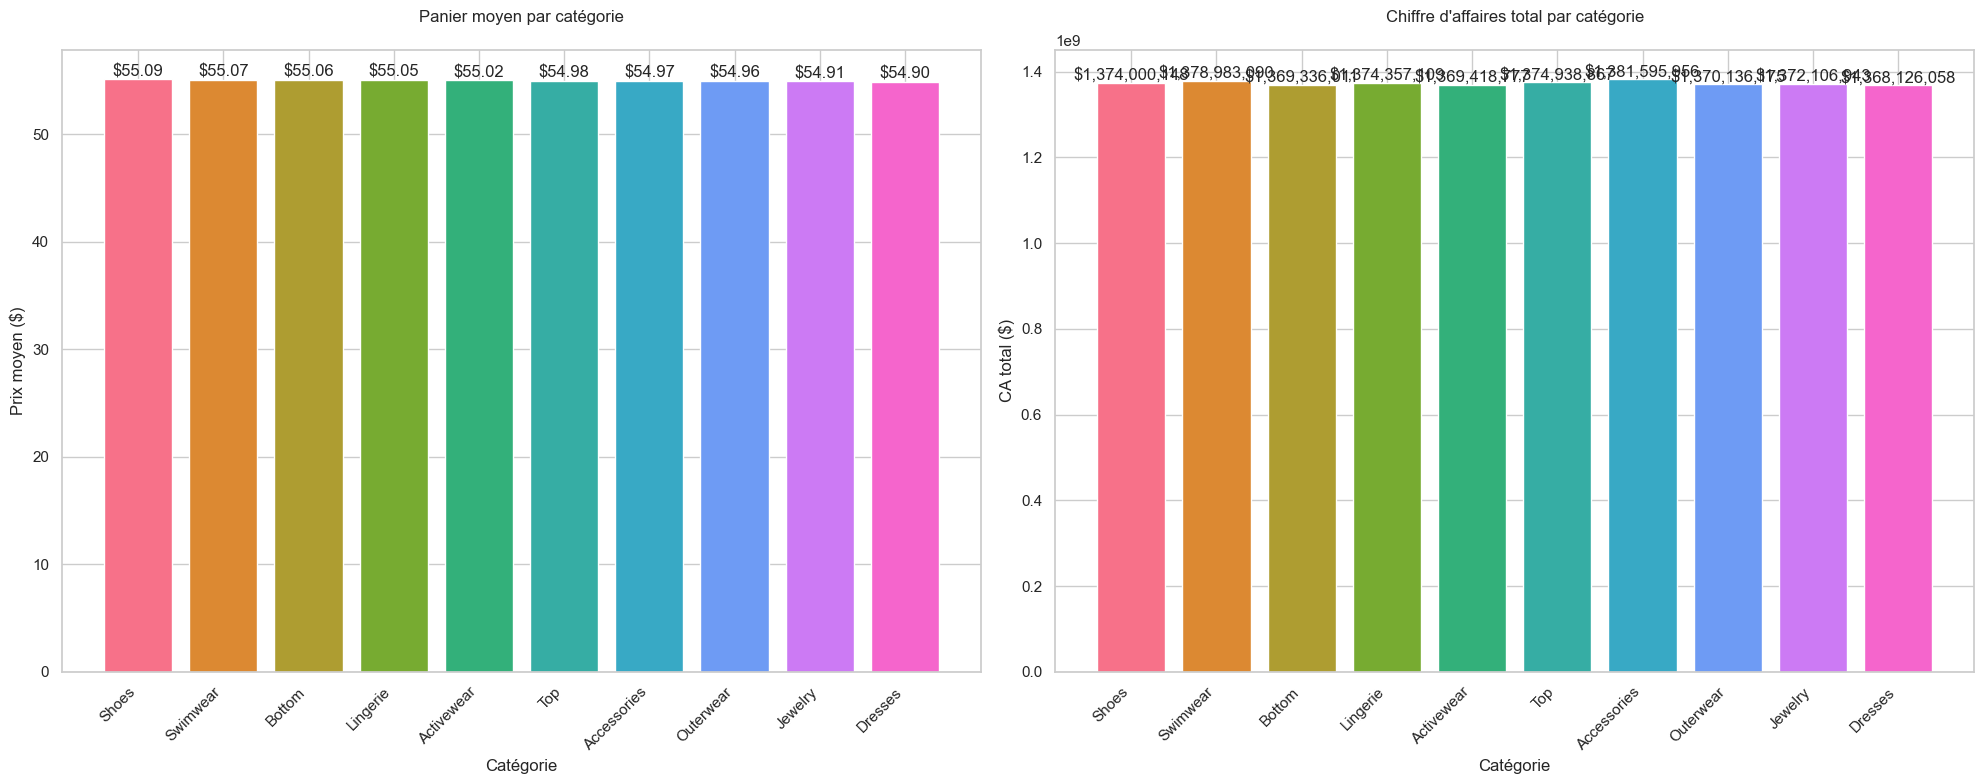

<Figure size 1500x600 with 0 Axes>

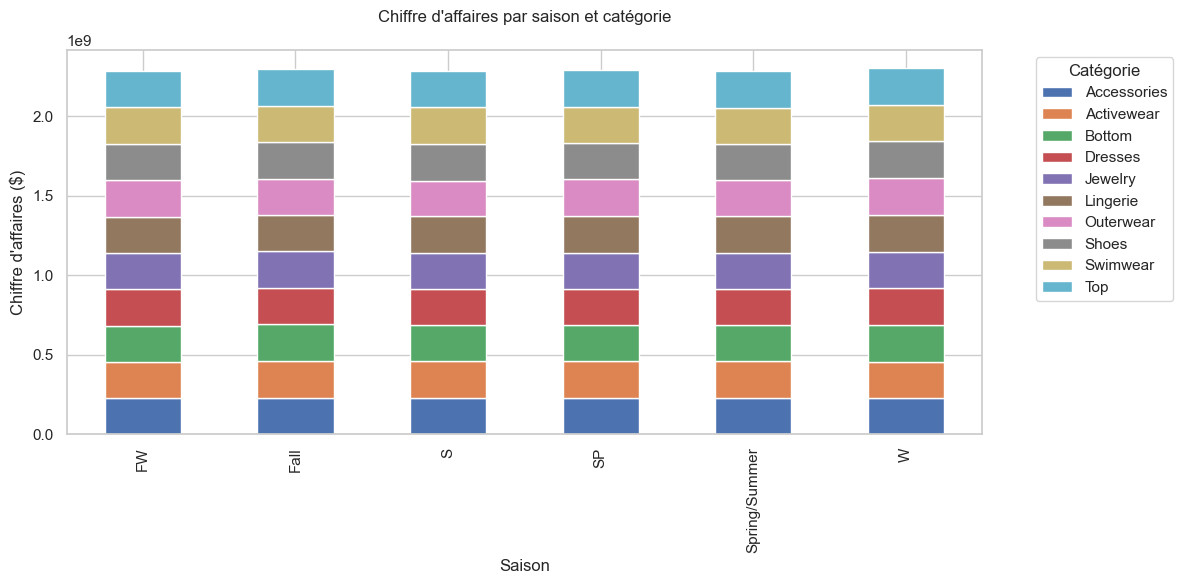

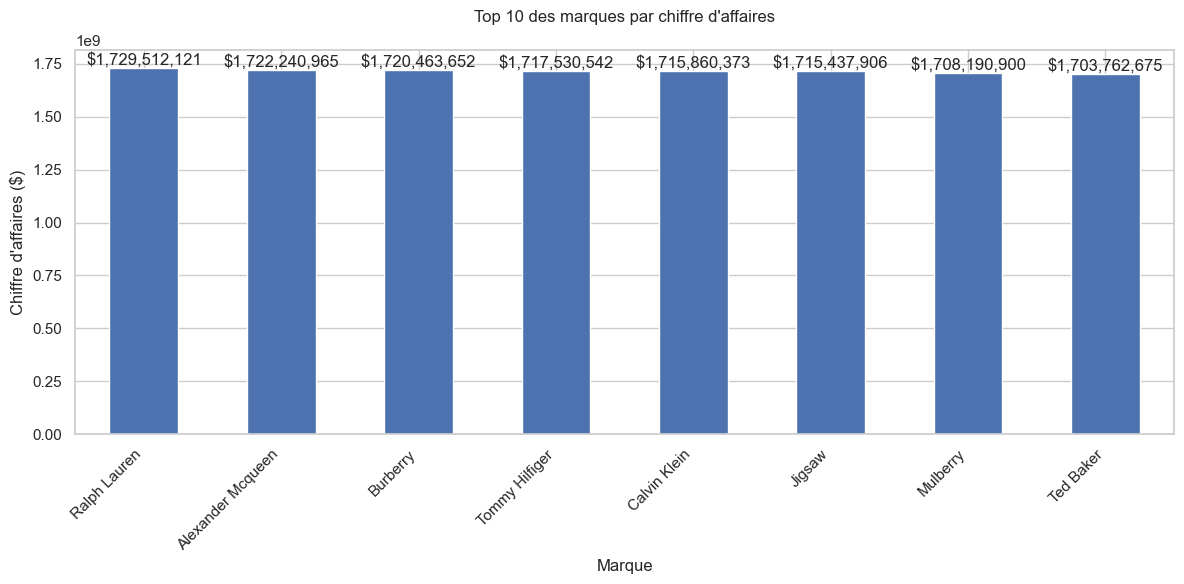


ANALYSE COMMERCIALE DÉTAILLÉE
--------------------------------------------------

1. INDICATEURS GLOBAUX
Chiffre d'affaires total: $13,732,999,132.82
Panier moyen: $55.00
Nombre de transactions: 249,602,431

2. PERFORMANCE PAR CATÉGORIE
                 CA Total  CA Moyen  Prix Moyen  Nombre de Ventes
Category                                                         
Accessories  1.381596e+09  13775.87       54.97          25112232
Swimwear     1.378983e+09  13744.75       55.07          25012264
Top          1.374939e+09  13743.75       54.98          24982999
Lingerie     1.374357e+09  13750.58       55.05          24952092
Shoes        1.374000e+09  13768.50       55.09          24935306
Jewelry      1.372107e+09  13699.83       54.91          24987637
Outerwear    1.370136e+09  13690.96       54.96          24937287
Activewear   1.369419e+09  13728.37       55.02          24908928
Bottom       1.369336e+09  13739.25       55.06          24837910
Dresses      1.368126e+09  13688.10 

/var/folders/vq/7f683s5n6990zmj58mg4vms40000gn/T/ipykernel_38020/1600513822.py:148: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_metrics = df.groupby('Age_Segment').agg({


In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration du style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

# Chargement des données
df = pd.read_csv('../data/stats/mock_fashion_data_cleaned.csv')

# Calcul du chiffre d'affaires
df['Revenue'] = df['Price'] * df['Review Count']
df['Age_Segment'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 100], labels=['18-25', '26-35', '36-50', '50+'])

# 1. Analyse du chiffre d'affaires par segment
plt.figure(figsize=(15, 6))
revenue_by_segment = df.pivot_table(
    values='Revenue',
    index='Category',
    columns='Age_Segment',
    aggfunc='sum'
).fillna(0)

revenue_by_segment.plot(kind='bar', stacked=True)
plt.title('Répartition du chiffre d\'affaires par catégorie et segment d\'âge', pad=20)
plt.xlabel('Catégorie')
plt.ylabel('Chiffre d\'affaires ($)')
plt.legend(title='Segment d\'âge', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# 2. Analyse du panier moyen et de la rentabilité
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Calcul des métriques de rentabilité 
profitability = df.groupby('Category').agg({
    'Price': 'mean',  # Calcule la vraie moyenne
    'Revenue': 'sum'
}).sort_values('Price', ascending=False)

# Configuration des couleurs
colors = sns.color_palette("husl", len(profitability))

# Graphique du panier moyen
bars1 = ax1.bar(range(len(profitability)), profitability['Price'], color=colors)
ax1.set_title('Panier moyen par catégorie', fontsize=12, pad=20)
ax1.set_xlabel('Catégorie')
ax1.set_ylabel('Prix moyen ($)')
ax1.set_xticks(range(len(profitability)))
ax1.set_xticklabels(profitability.index, rotation=45, ha='right')
ax1.grid(True, axis='y')  # Ajout d'une grille pour meilleure lisibilité

# Ajout des valeurs sur les barres avec 2 décimales
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',  # 2 décimales au lieu de 0
             ha='center', va='bottom')

# Graphique du chiffre d'affaires
bars2 = ax2.bar(range(len(profitability)), profitability['Revenue'], color=colors)
ax2.set_title('Chiffre d\'affaires total par catégorie', fontsize=12, pad=20)
ax2.set_xlabel('Catégorie')
ax2.set_ylabel('CA total ($)')
ax2.set_xticks(range(len(profitability)))
ax2.set_xticklabels(profitability.index, rotation=45, ha='right')

# Ajout des valeurs sur les barres
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 3. Analyse saisonnière des ventes
plt.figure(figsize=(15, 6))
seasonal_revenue = df.pivot_table(
    values='Revenue',
    index='Season',
    columns='Category',
    aggfunc='sum'
).fillna(0)

seasonal_revenue.plot(kind='bar', stacked=True)
plt.title('Chiffre d\'affaires par saison et catégorie', pad=20)
plt.xlabel('Saison')
plt.ylabel('Chiffre d\'affaires ($)')
plt.legend(title='Catégorie', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# 4. Performance des marques
plt.figure(figsize=(12, 6))
top_brands = df.groupby('Brand').agg({
    'Revenue': 'sum',
    'Price': 'mean',
    'Review Count': 'sum'
}).sort_values('Revenue', ascending=False).head(10)

ax = top_brands['Revenue'].plot(kind='bar')
plt.title('Top 10 des marques par chiffre d\'affaires', pad=20)
plt.xlabel('Marque')
plt.ylabel('Chiffre d\'affaires ($)')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(top_brands['Revenue']):
    ax.text(i, v, f'${v:,.0f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Statistiques détaillées
print("\nANALYSE COMMERCIALE DÉTAILLÉE")
print("-" * 50)

# Performances globales
print("\n1. INDICATEURS GLOBAUX")
print(f"Chiffre d'affaires total: ${df['Revenue'].sum():,.2f}")
print(f"Panier moyen: ${df['Price'].mean():,.2f}")
print(f"Nombre de transactions: {df['Review Count'].sum():,}")

# Performance par catégorie
print("\n2. PERFORMANCE PAR CATÉGORIE")
category_metrics = df.groupby('Category').agg({
    'Revenue': ['sum', 'mean'],
    'Price': 'mean',
    'Review Count': 'sum'
}).round(2)
category_metrics.columns = ['CA Total', 'CA Moyen', 'Prix Moyen', 'Nombre de Ventes']
print(category_metrics.sort_values('CA Total', ascending=False))

# Performance saisonnière
print("\n3. PERFORMANCE SAISONNIÈRE")
season_metrics = df.groupby('Season').agg({
    'Revenue': ['sum', 'mean'],
    'Review Count': 'sum'
}).round(2)
season_metrics.columns = ['CA Total', 'CA Moyen', 'Nombre de Ventes']
print(season_metrics.sort_values('CA Total', ascending=False))

# Segments rentables
print("\n4. SEGMENTS LES PLUS RENTABLES")
segment_metrics = df.groupby('Age_Segment').agg({
    'Revenue': ['sum', 'mean'],
    'Price': 'mean'
}).round(2)
segment_metrics.columns = ['CA Total', 'CA Moyen', 'Panier Moyen']
print(segment_metrics.sort_values('CA Total', ascending=False))